# **Hospital Length of Stay (LOS) Prediction**
by Deepikaa Sriram

Problem Statement and Dataset provided by the MIT Applied Data Science Program

## **Objective:**

As a Data Scientist, I have been hired by "HealthPlus" to analyze a dataset to determine **which factors most significantly impact the LOS and effectively predict the LOS of a patient**. Utilizing data available during several patient's admission, **I utilized linear regression and non-linear regression modeling to identify the most optimal machine learning model that can predict the LOS of a patient**.  

Using the model I have generated below, the hospital will be able to **more effectively identify important business insights to better guide their healthcare infrastructure, policies, resource allocation, and revenue.** 

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Prediction Modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Model Performance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.preprocessing import LabelEncoder

# Prediction Modeling

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.preprocessing import LabelEncoder

# Model Tuning
from sklearn.model_selection import GridSearchCV

# Check the model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv("healthcare_data.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [5]:
df.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


In [6]:
df.shape

(500000, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

In [8]:
df["patientid"].value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

### Observations 

* Numeric data: Available Extra Rooms in Hospial, Staff Available, Patient ID, Visitors with patient, Stay (in days)
* Other data typs: Department, Ward facility code, Doctor Name, Age, Gender, Type of Admission, Severity of Illness, Health Conditions, Insurance, Admission Deposit 
* The number of non-null values is the same as the total number of entries in the data, which means there are no missing values. 
* The max number of times a patient has been admitted is 21, and the min is 1

Patient ID is an identifier column and will not help with analysis, so we can now drop this column. 

In [9]:
df_copy=df.drop(columns=["patientid"])

In [10]:
df_copy.duplicated().sum()

0

There are no duplicated rows in the dataset

In [11]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


Observations from description of numerical columns (depicted here as rows) in the dataset: 
* There are an average and median of 3 extra rooms available in the hospital (with the min being 0 and max being 24) 
* There is an average and median value of of 5 staff available (with the min being 0 and max being 10)
* There is an average of 3-4 visitors for patients, however there may be outliers impacting this data considering the max value is 32, but the median is 3. 
* The average admission deposit is 4722 and the median deposit is 4627. The min is 1654 and max is 10,104.
* The average LOS is 12.38, but there may be outliers impacting this data, as indicated by the median LOS being 9 days. 

In [12]:
cat_col= ["Department", "Ward_Facility_Code", "doctor_name", "Age", "gender", "Type of Admission", "Severity of Illness", "health_conditions", "Insurance"]

for column in cat_col:
    print (df_copy[column].value_counts(1))
    print ("-"*30)

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
------------------------------
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: Ward_Facility_Code, dtype: float64
------------------------------
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: doctor_name, dtype: float64
------------------------------
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: Age, dtype: float64
------------------------------
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
------------------------------
T

### Observations: ###
* Gynecology is the department/service line with the highest number of admits, consisting of 68.6% of the inpatient admissions. 
* Dr. Sarah and Dr. Olivia see the highest percentage of patients, 19.9% and 19.6% respectively. 
* Individuals between the age of 21-30 consist of 31.9% of inpatient admissions, which is highest percentage. 
* Females consist of 71.4% of admissions, males consist of 20.7% of admissions, and other individuals consist of 5.1% of admissions. 
* Most of the hospital admissions are Trauma-related (62%). 
* 56% of admissions are moderate severity, 26% are minor, and 17% are extreme.
* The majority (30.3%) of admitted patients have no pre-existing major conditions. 

## Univariate Analysis

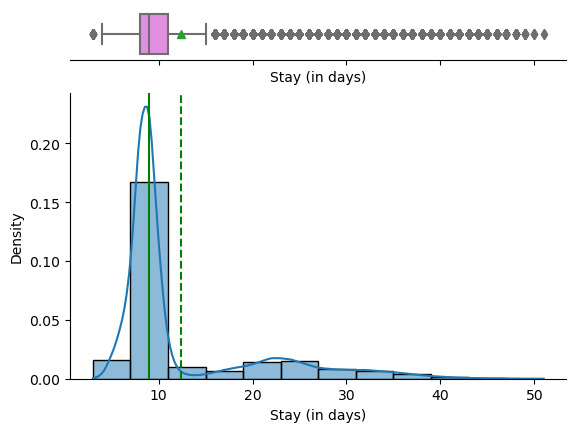

In [78]:
x = df_copy["Stay (in days)"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

mean_value = np.mean(df_copy["Stay (in days)"])
median_value = np.median(df_copy["Stay (in days)"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Observations**
* **Very few patients stay for more than 40 days**, which may be because the majority of patients are admitted for moderate or minor illnesses
* The peak of the distribution indicates that **most patients stay for 8-9 days.**

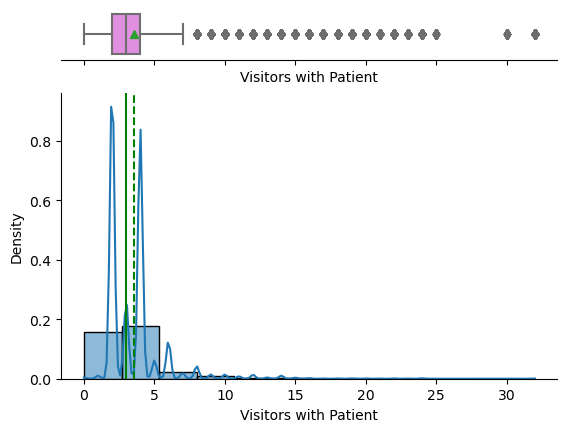

In [77]:
x = df_copy["Visitors with Patient"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

mean_value = np.mean(df_copy["Visitors with Patient"])
median_value = np.median(df_copy["Visitors with Patient"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Observations**
* The majority of patients have between 0-5 visitors, with the outlier(s) being 30+ visitors

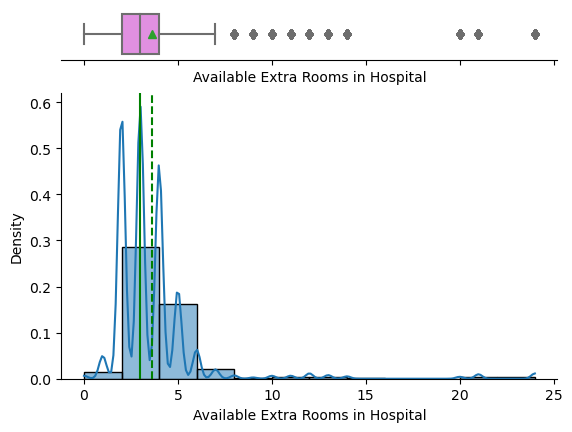

In [79]:
x = df_copy["Available Extra Rooms in Hospital"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

mean_value = np.mean(df_copy["Available Extra Rooms in Hospital"])
median_value = np.median(df_copy["Available Extra Rooms in Hospital"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Observations** 
* Bed space is a critical factor that impacts ability to take new admits within a hospital. Especially when facing large influx of admits, **it is important for hospitals to maintain adequate bedspace to accommodate new patients.*8 
* When looking at this chart, **the peak of the distribution appears to be between 2-4 beds available**. 

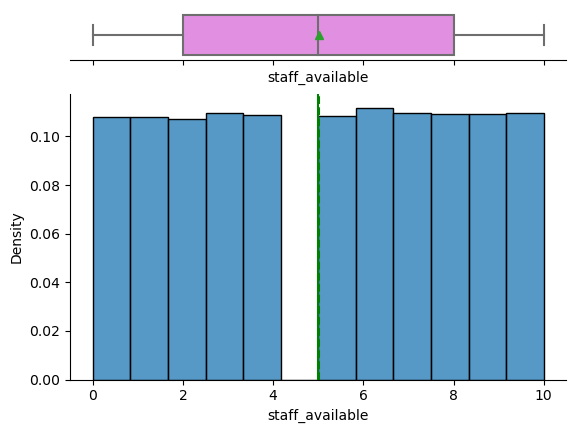

In [80]:
x = df_copy["staff_available"]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box, showmeans = True, color = "violet")
sns.histplot(x=x, bins=12, stat='density', ax=ax_hist)

mean_value = np.mean(df_copy["staff_available"])
median_value = np.median(df_copy["staff_available"])
ax_hist.axvline(x=mean_value, color='green', linestyle = "--")
ax_hist.axvline(x=median_value, color='green', linestyle = "-")

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Observations**
* There appears to be an even spread of number of staff available, from 0-10. 

## Bivariate Analysis

In [17]:
corr_matrix = df_copy.corr()
corr_matrix

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.001784,0.070459,-0.050127,-0.019219
staff_available,-0.001784,1.000000,0.000578,0.000763,0.007398
Visitors with Patient,0.070459,0.000578,1.000000,-0.069043,0.027302
Admission_Deposit,-0.050127,0.000763,-0.069043,1.000000,0.044203
Stay (in days),-0.019219,0.007398,0.027302,0.044203,1.000000


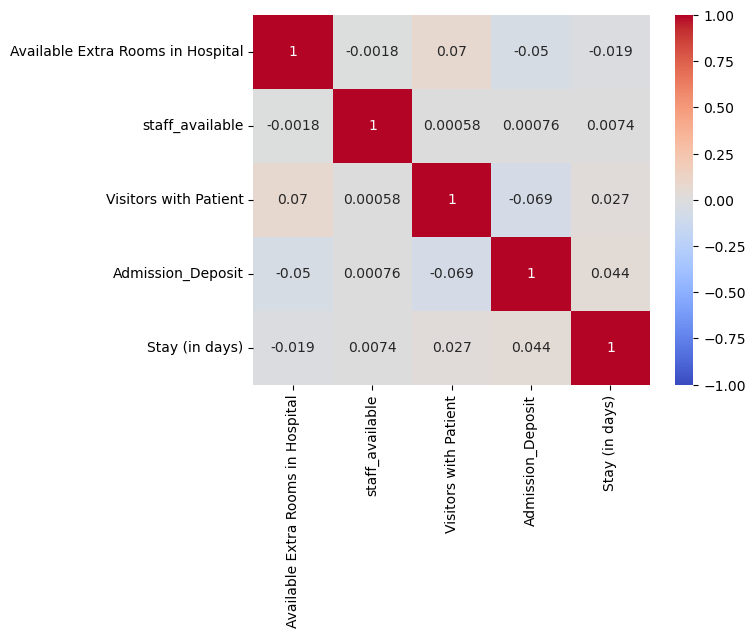

In [18]:
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "coolwarm")
plt.show()

**Observation**
* There is no correlation between the continuous the variables
* More importantly, there appears to be **no apparent correlation between any of the continuous variables and Stay (in days)**, which could indicate that the **categorical variables may be more important for building the model** 

In [19]:
cross_tab_prop = pd.crosstab(index=df_copy['Ward_Facility_Code'],
                             columns=data['Department'],
                             normalize="index")

cross_tab = pd.crosstab(index=df_copy['Ward_Facility_Code'],
                             columns=data['Department'])

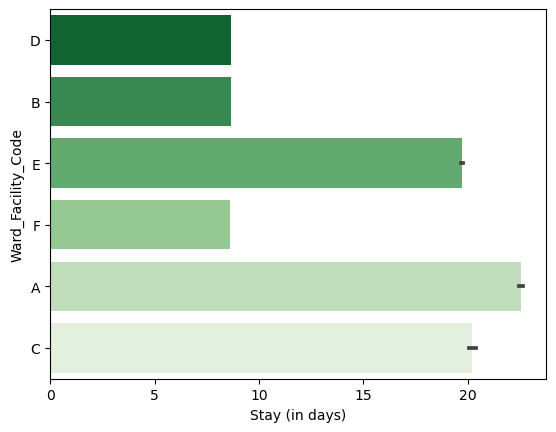

In [20]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = df_copy, palette = "Greens_r")
plt.show()

**Observations**
* Wards **A, C, and E all house the patients with the greatest length of stay**, which could indicate units that **provide care for a higher level of acuity** (i.e. Medically Complex) 

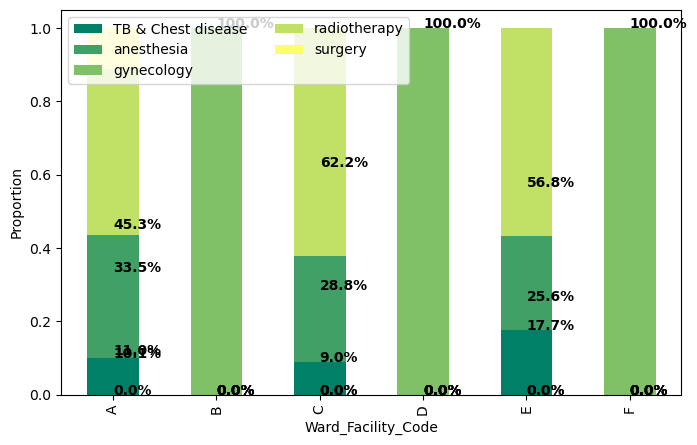

In [21]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='summer', 
                    figsize=(8, 5))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Ward_Facility_Code")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

**Observations**
* When exploring this relationship further, we see that Wards A, C, and E (*units that house patients with the longest Length of Stay*) provide care for patients that fall under the **"TB & Chest Disease", "Anesthesia", and "Radiotherapy" Servicelines/Departments** 
* Units B, D, and F are solely dedicated to providing **gynecological services**

In [22]:
crosstab_severity_prop = pd.crosstab(index=df_copy['Ward_Facility_Code'],
                             columns=data['Severity of Illness'],
                             normalize="index")

crosstab_severity = pd.crosstab(index=df_copy['Ward_Facility_Code'],
                             columns=data['Severity of Illness'])

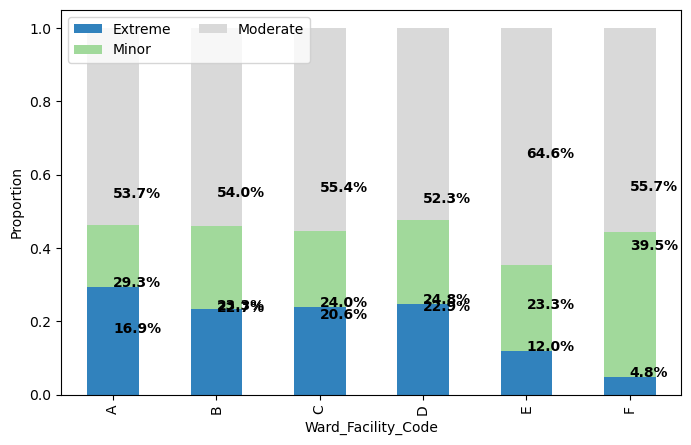

In [23]:
crosstab_severity_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20c', 
                    figsize=(8, 5))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Ward_Facility_Code")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for proportion in crosstab_severity_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

**Observations**
* The majority of patients across the Wards house are Moderately Severe cases
* Ward A, which has the longest length of stay, also houses the highest percentage of **Extreme Cases**

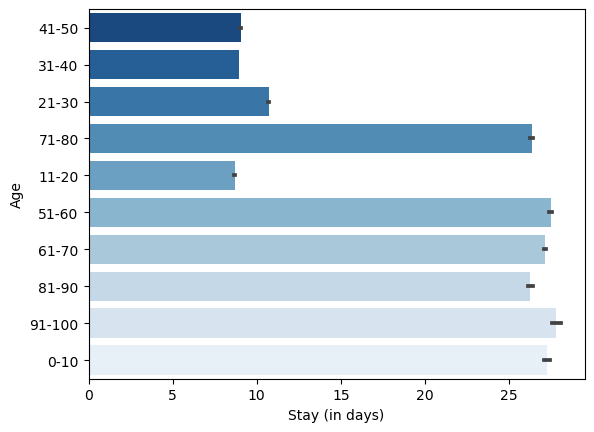

In [24]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = df_copy, palette = "Blues_r")
plt.show()

**Observations**
* Age could also impact length of stay. It appears that patients between the ages of **0-10** and **51-100** comprise of the patients with the greatest length of stay. 

In [25]:
df_copy.groupby(['doctor_name'])['Department'].agg(Department_Name='unique',Patients_Treated='count').sort_values(by='Patients_Treated')

,Department_Name,Patients_Treated
doctor_name,,
Dr Simon,[surgery],1779
Dr Isaac,[surgery],3359
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Sam,[radiotherapy],55711
Dr Nathan,[gynecology],70777
Dr Sophia,[gynecology],74753
Dr Olivia,[gynecology],98352
Dr Sarah,[gynecology],99596


**Observations**
* The hospital has a total of 9 MDs, each working in a particular department/service line. Some MDs work across multiple departments.


* **Gynecology MDs**: Dr. Nathan, Dr. Olivia, Dr. Sarah, Dr. Sophia
* **TB & Chest Disease**: Dr. John, Dr. Mark 
* **Anesthesia**: Dr. John, Dr. Mark
* **Radiotherapy**: Dr. John, Dr. Sam
* **Surgery**: Dr. Isaac, Dr. Simon


* The **gynecology service line sees the most patients at the hospital**, with **Dr. Olivia and Dr. Sarah** seeing the most number of patients within the department. 

## Preparing the Data for Modeling ##

**Step 1:** Encode Categorical features by creating Dummy Variables

In [26]:
df_copy = pd.get_dummies(df_copy, columns = df_copy.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)

In [27]:
df_copy

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554.835677,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,2,8,2,5624.733654,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,7,4,4814.149231,8,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,2,10,2,5169.269637,34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
499996,13,8,2,4631.550257,11,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
499997,2,3,2,5456.930075,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
499998,2,1,2,4694.127772,23,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


**Step 2:** Separate the independent variable (Length of Stay) from the other variables

In [28]:
x = df_copy.drop('Stay (in days)',axis=1)

y = df_copy['Stay (in days)'] 

**Step 3:** Split the dataset into train and test data. 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

I have set the test size to 0.2, which means that 20% of the data should be allocated to the test set, and 80% of the data should be allocated to the training set. Setting the **shuffle = True** means that the data will be randomly shuffled before being split into test/training. Setting the **random_state = 1** means that if a user repeats this test with the seed value of 1, the shuffling will be **deterministic and repeatable**, which makes it easier to compare different models or make changes to the code. It also ensures that the model's performance is not affected by random variations in the data split, making the evaluation of the model more reliable.

In [30]:
x_train.shape

(400000, 42)

In [31]:
x_test.shape

(100000, 42)

## Building the Model ##

The sklearn toolkit can be used to calculate **RMSE, MAE, R squared, adjusted R squared, and MAPE** for regression model evaluation. 

**RMSE (Root Mean Squared Error):** Measures the average deviation of the predicted values from the true values and is expressed in the same units as the target variable. Penalizes large errors more than smaller errors. 

**MAE (Mean Absolute Error):** Measures the average absolute difference between the predicted values and the true values and is expressed in the same units as the target variable. Less sensitive to outliers than RMSE.

**R-squared (Coefficient of determination):** Measures the proportion of the variance in the target variable that can be explained by the linear regression model. Ranges from 0 to 1, with higher values indicating a better fit between the model and the data.

**Adjusted R-squared:** A modified version of R-squared that takes into account the number of predictor variables in the model. Helps prevent overfitting of the data by penalizing the inclusion of unnecessary predictor variables in the model, which thereby provides a better measure of the model's performance on unseen data. 

**MAPE (Mean Absolute Percentage Error):** Measures accuracy of predictions as a percentage. Often used in situations where the target variable has a wide range of values or when the absolute error is more important than the relative error. Works better when no extreme values are present in the data and none of the actual values are 0. 

In [32]:
#Calculate Adjusted R2
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#Calculate MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Compute different metrics to check regression model performance
def model_performance_regression(model, predictors, target):
    """
    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    
    adjr2 = adj_r2_score(predictors, target, pred)
    
    rmse = np.sqrt(mean_squared_error(target, pred))
    
    mae = mean_absolute_error(target, pred)
    
    mape = mape_score(target, pred)

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        
        index = [0],
    )

    return df_perf

In [33]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model performance on the test and the train data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Prediction on the training data
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on the test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    ) 

In [34]:
import statsmodels.api as sm

#Since Statsmodel api does not add a constant by default, it can be added manually to the train and test data. 
x_train1 = sm.add_constant(x_train)
x_test1 = sm.add_constant(x_test)

# Create the model and summary
olsmodel1 = sm.OLS(y_train, x_train1).fit()

olsmodel1.summary()

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        19:24:29   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [35]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842962,19.676874


**Observations**
* The **R squared value is 0.84**
* The **Adjusted R-squared value** is very close to the R-squared value, which indicates that this model **which indicates that the model is performing fairly well and can explain variance in the LOS of patients for up to 84%** 

In [36]:
model_pref(olsmodel1, x_train1, x_test1, y_train,y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135092  2.146240  19.591781
1   Test  3.144036  2.155759  19.676874


The RMSE, MAE, and MAPE values are very similar between the train and test dataset, indicating that the **model is not overfitting** 

### Dropping the Insignificant Variables ###

When examining the P values for each variable, it appears that not every regression coefficient for the varibales are significant. Therefore they can be dropped to further tune the model. We can define a significant p value as α ≤0.05 with a 95% confidence interval. 

The regression coefficients corresponding to `staff_available`, `Visitors with Patient`, `Ward_Facility_Code_F`, `Age_81-90`, `gender_Other`, `health_conditions_High Blood Pressure`, `health_conditions_None`, `health_conditions_Other`, and `Insurance_Yes` **are not statistically significant for α = 0.05.** 

In [37]:
#drop the insignificant variables in the train and test datasets 
x_train2 = x_train1.drop(columns = {'staff_available', 'Visitors with Patient', 'Ward_Facility_Code_F', 'Age_81-90', 'gender_Other', 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_Yes'})
x_test2 = x_test1.drop(columns = {'staff_available', 'Visitors with Patient', 'Ward_Facility_Code_F', 'Age_81-90', 'gender_Other', 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_Yes'})

# Recreate the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 7.148e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        19:24:29   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399969   BIC:                         2.050e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                19.8738      0.038    523.436      0.000      19.799      19.948
Available Extra Rooms in Hospital     0.0786      0.002     42.396      0.000       0.075       0.082
Admission_Deposit                 -3.842e-05   4.77e-06     -8.050      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                 6.0820      0.029    210.267      0.000       6.025       6.139
Department_gynecology                 0.4666      0.021     22.502      0.000       0.426       0.507
Department_radiotherapy              -4.6220      0.037   -126.346      0.000      -4.694      -4.550
Department_surgery                    9.6826      0.043    222.975      0.000       9.597       9.768
Ward_Facility_Code_B                  0.2534      0.015     16.602      0.000       0.223       0.283
Ward_Facility_Code_C                  0.4347      0.034     12.608      0.000       0.367       0.502
Ward_Facility_Code_D                  0.1996      0.015     13.533      0.000       0.171       0.229
Ward_Facility_Code_E                  0.3091      0.021     14.472      0.000       0.267       0.351
doctor_name_Dr John                   7.2507      0.027    269.528      0.000       7.198       7.303
doctor_name_Dr Mark                   1.1926      0.033     36.563      0.000       1.129       1.257
doctor_name_Dr Nathan                -0.2049      0.015    -13.775      0.000      -0.234      -0.176
doctor_name_Dr Olivia                -0.3493      0.014    -24.546      0.000      -0.377      -0.321
doctor_name_Dr Sam                    1.2814      0.038     33.869      0.000       1.207       1.356
doctor_name_Dr Sarah                  0.8043      0.015     53.972      0.000       0.775       0.834
doctor_name_Dr Simon                  6.1498      0.069     89.699      0.000       6.015       6.284
doctor_name_Dr Sophia                 0.2165      0.021     10.519      0.000       0.176       0.257
Age_11-20                           -12.7257      0.042   -306.351      0.000     -12.807     -12.644
Age_21-30                           -10.4708      0.036   -288.736      0.000     -10.542     -10.400
Age_31-40                           -13.4232      0.036   -375.422      0.000     -13.493     -13.353
Age_41-50                           -13.4992      0.036   -370.479      0.000     -13.571     -13.428
Age_51-60                            -0.3542      0.041     -8.721      0.000      -0.434      -0.275
Age_61-70                            -0.4094      0.039    -10.384      0.000      -0.487      -0.332
Age_71-80                            -0.2070      0.042     -4.966      0.000      -0.289      -0.125
Age_91-100                           -0.2482      0.100     -2.477      0.013      -0.445      -0.052
gender_Male            

In [38]:
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144105,2.155755,0.843023,0.84297,19.676739


In [39]:
model_pref(olsmodel2, x_train2, x_test2, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135121  2.146261  19.591892
1   Test  3.144105  2.155755  19.676739


**Observations**
* The **R squared value is 0.84**
* The **Adjusted R-squared value** is very close to the R-squared value, which indicates that this model **which indicates that the model is performing fairly well and can explain variance in the LOS of patients for up to 84%** 

* The RMSE, MAE, and MAPE scores do not differ very much between the train and test dataset. Therefore, the model does not appear to be overfitting and also generalizes well between the train and test dataset. 

### Cross Validation ###

Cross validation is a resampling method that uses different portions of the data to test and train a model on different iterations. This will help estimate how a predictive model will perform in practice.  

In [40]:
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

# Divide the dataset into cv=10 folds
cv_Score11 = cross_val_score(linearregression, x_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1 * cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.843 (+/- 0.004)
Mean Squared Error: 9.832 (+/- 0.296)


**Observations**
* When we applied the model to 10 different iterations of the dataset, we obtained similar r-squared value to the whole training and test dataset.

Let's see whether we can employ feature engineering to further tune the model and obtain a lower MSE.

In [41]:
coef = olsmodel2.params
coef

const                                19.873791
Available Extra Rooms in Hospital     0.078619
Admission_Deposit                    -0.000038
Department_anesthesia                 6.082010
Department_gynecology                 0.466594
Department_radiotherapy              -4.621989
Department_surgery                    9.682582
Ward_Facility_Code_B                  0.253351
Ward_Facility_Code_C                  0.434731
Ward_Facility_Code_D                  0.199594
Ward_Facility_Code_E                  0.309118
doctor_name_Dr John                   7.250669
doctor_name_Dr Mark                   1.192581
doctor_name_Dr Nathan                -0.204908
doctor_name_Dr Olivia                -0.349337
doctor_name_Dr Sam                    1.281366
doctor_name_Dr Sarah                  0.804327
doctor_name_Dr Simon                  6.149808
doctor_name_Dr Sophia                 0.216511
Age_11-20                           -12.725687
Age_21-30                           -10.470843
Age_31-40    

In [42]:
Equation = "Stay (in days)="
print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Stay (in days)=	( 19.873791208815586 ) *  const + ( 0.07861910039496295 ) *  Available Extra Rooms in Hospital + ( -3.842055619676761e-05 ) *  Admission_Deposit + ( 6.082009876874812 ) *  Department_anesthesia + ( 0.46659368247337324 ) *  Department_gynecology + ( -4.621988990506552 ) *  Department_radiotherapy + ( 9.682582067568637 ) *  Department_surgery + ( 0.25335083052441354 ) *  Ward_Facility_Code_B + ( 0.43473141777338614 ) *  Ward_Facility_Code_C + ( 0.19959404619904778 ) *  Ward_Facility_Code_D + ( 0.30911756554228353 ) *  Ward_Facility_Code_E + ( 7.250668829257519 ) *  doctor_name_Dr John + ( 1.1925809939251821 ) *  doctor_name_Dr Mark + ( -0.20490771930677615 ) *  doctor_name_Dr Nathan + ( -0.34933692660664817 ) *  doctor_name_Dr Olivia + ( 1.2813656355904788 ) *  doctor_name_Dr Sam + ( 0.8043274273889015 ) *  doctor_name_Dr Sarah + ( 6.149808127870118 ) *  doctor_name_Dr Simon + ( 0.21651090099782613 ) *  doctor_name_Dr Sophia + ( -12.725686771115802 ) *  Age_11-20 + ( -10.

**Interpretation of the Regression Coefficients**

An R-squared value of approximately 0.84 indicates that we can capture 84% of the variation of the target variable. All our p-values for the variables in this iteration of the model are <0.05, meaning they are statistically significant. 

* LOS decreases when Department_radiotherapy increases. 1 unit decrease in Department_radiotherapy leads to a decrease in LOS by about 4.62 times the LOS when everything else is constant. 

* LOS increases with an increase in Department_anesthesia. 1 unit increase in Department_anesthesia leads to a decrease in LOS by about 6.08 times the LOS when everything else is constant. This is understandable, as use of anesthesia is reserved for more invasive procedures, which may result in an increased LOS. 

* LOS increases with an increase in Department_surgery. 1 unit increase in Department_surgery leads to a decrease in LOS by about 9.68 times the LOS when everything else is constant. This is understandable, as many surgeries require  inpatient recovery and monitoring prior to discharge, which results in increased LOS. 

* LOS increases with an increase in doctor_name_Dr Simon. 1 unit increase in doctor_name_Dr Simon leads to a decrease in LOS by about 6.14 times the LOS when everything else is constant. Dr. Simon is responsible for surgical cases, which likely contributes to this increased LOS. 

* LOS decreases with an increase in Age_11-20. 1 unit increase in Age_11-20 leads to a decrease of LOS by about 12.72 times the LOS when everything else is constant. Adolescents tend to have a shorter recovery time and fewer pre-existing conditions that may impact overall health, which leads to earlier discharge. 

* Similarly, LOS decreases with an increase in Age_21-30. 1 unit increase in the Age_21-30 leads to a decrease of LOS by about 10.47 times the LOS when everything else is constant.

### Ridge Regression ###

In [43]:
rdg = Ridge()

In [44]:
rdg.fit(x_train, y_train)
model_pref(rdg, x_train, x_test, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135092  2.146301  19.592776
1   Test  3.144039  2.155819  19.677875


In [67]:
ridge_regression_perf_test = model_performance_regression(rdg, x_test, y_test)
ridge_regression_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144039,2.155819,0.84303,0.842964,19.677875


Ridge regression is producing similar results to Linear Regression without regularization. While Linear Regression produced a model that performed fairly well without overfitting, we may be able to produce a better model using non-linear methods. 

## Non-Linear Regression Modeling ##

### Decision Tree ### 

In [45]:
#To maintain good coding etiquette and make the findings replicable, it is vital to denote the random state (which in this case is 1)
dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(x_train, y_train)
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.81515,1.12829,0.94768,0.947658,9.341248


### Tuned Decision Tree

In [50]:
dtree_tuned = DecisionTreeRegressor(random_state = 1)

parameters = {'max_depth': np.arange(2, 8), 
              'criterion': ['squared_error', 'friedman_mse'],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes': [2, 5, 7] + [None]}

scorer = make_scorer(r2_score)

# Grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the decision tree regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_
dtree_tuned_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, random_state=1)

In [51]:
#Check the model performance on the test data
dtree_tuned_regressor_perf_test = model_performance_regression(dtree_tuned_regressor, x_test, y_test)

In [52]:
dtree_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.741743,1.161072,0.951826,0.951806,9.64668


### Visualizing the feature importance ###

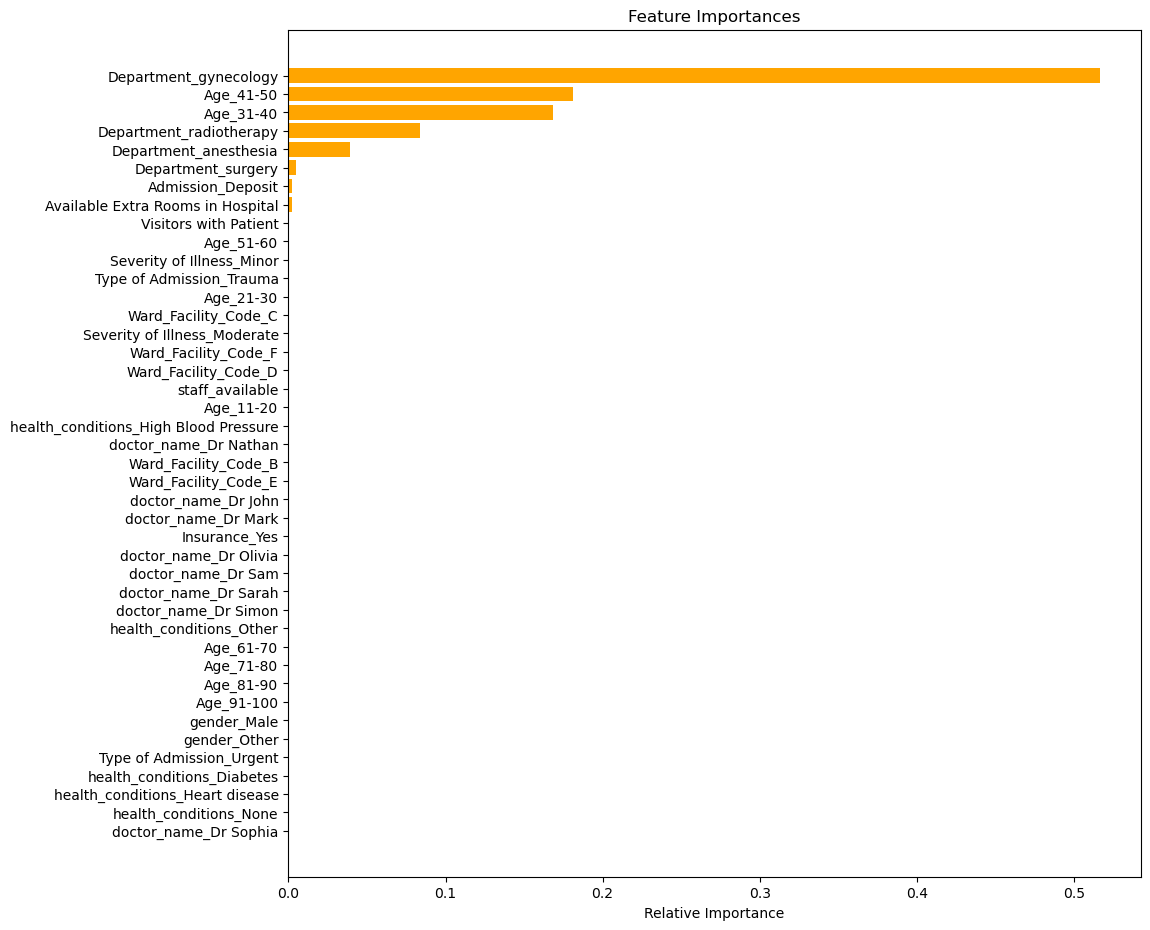

In [55]:
features = list(x.columns)

importances = dtree_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (11, 11))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = "orange", align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

* The most important features are **Department_gynecology, Age_41_50, and Age_31_40**, followed by Department_anesthesia, Department_anesthesia, and Department_surgery
* The remainder of the variables appear to have no impact on the model in deciding LOS

### Bagging Regressor ###

In [56]:
bagging_estimator = BaggingRegressor(random_state = 1)
bagging_estimator.fit(x_train, y_train)
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.36894,0.905205,0.970242,0.970229,7.648842


### Tuned Bagging Regressor ###

In [57]:
bagging_tuned = BaggingRegressor(random_state = 1)
parameters = {"n_estimators": [10, 15, 20],
              "max_samples": [0.8, 1],
              "max_features": [0.8, 1]}

scorer = make_scorer(r2_score)

# Grid Search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the bagging tuned regressor to the best combination of parameters
bagging_tuned_regressor = grid_obj.best_estimator_
bagging_tuned_regressor.fit(x_train, y_train)

BaggingRegressor(max_features=0.8, max_samples=0.8, n_estimators=15,
                 random_state=1)

In [58]:
bagging_tuned_regressor_perf_test = model_performance_regression(bagging_tuned_regressor, x_test, y_test)
bagging_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.536988,1.032587,0.962487,0.962471,8.952246


### Random Forest Regressor ###

In [59]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor.fit(x_train, y_train)
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)
regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.303684,0.86505,0.973011,0.973,7.314995


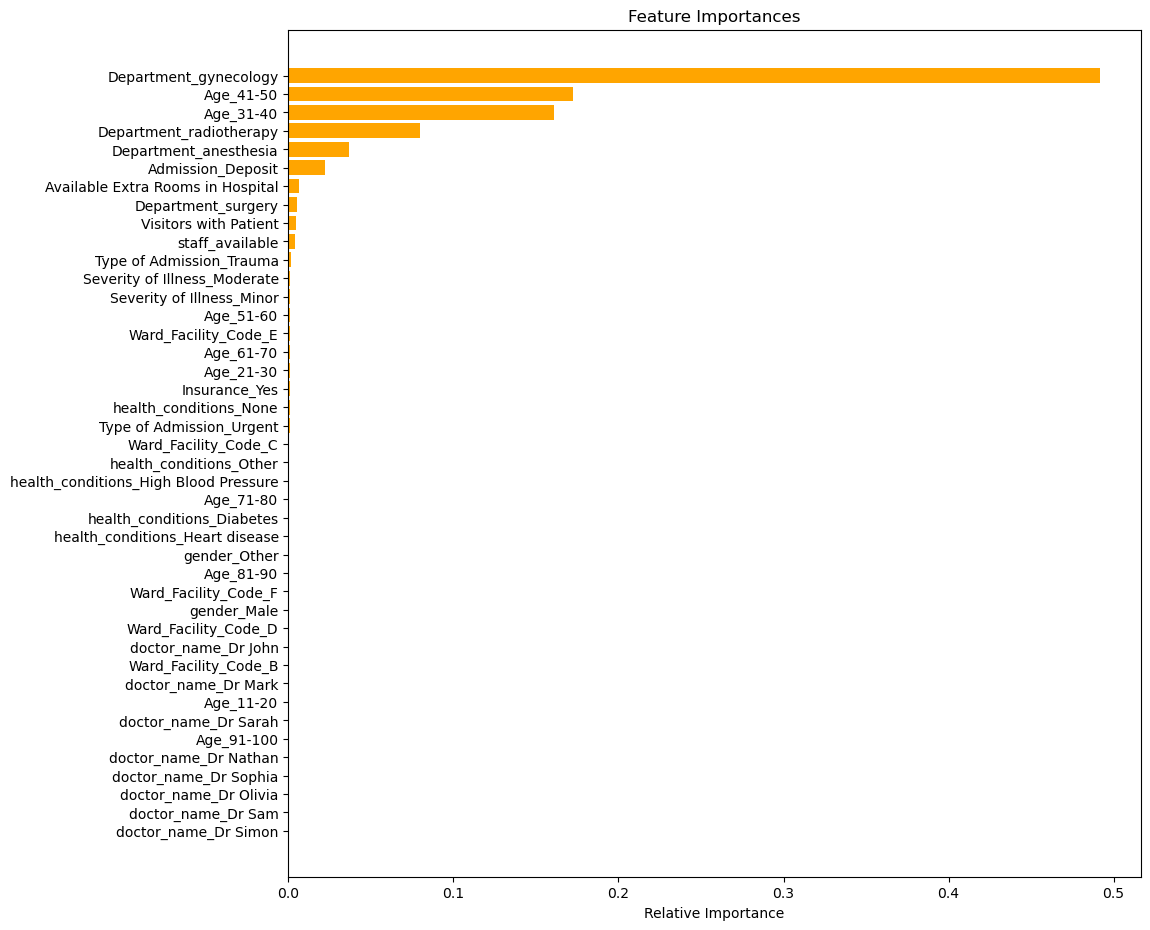

In [61]:
importances = regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (11,11))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'orange', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuned Random Forest Regressor ###

In [62]:
rf_tuned = RandomForestRegressor(random_state = 1)

parameters = {"n_estimators": [110, 120],
    "max_depth": [5, 7],
    "max_features": [0.8, 1]}

scorer = make_scorer(r2_score)

# Grid Search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [63]:
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)
rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.722809,1.156349,0.952868,0.952848,9.640594


### Visualizing the Feature Importance ###

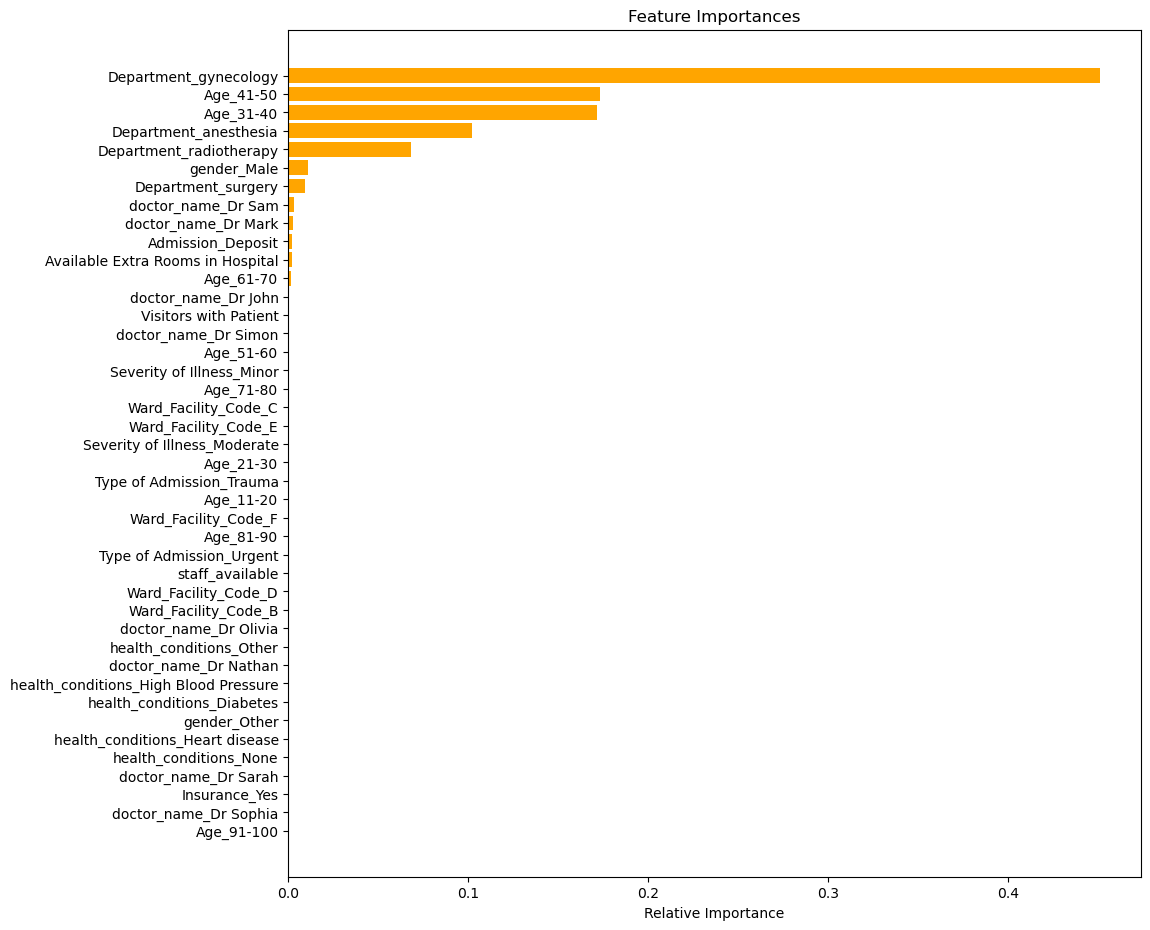

In [65]:
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (11, 11))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'orange', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* The 5 most important features in this model are the same as the top 5 in the decision tree model. There are some features, such as doctors and gender, that add some value to the model.

In [68]:
models_test_comp_df = pd.concat(
    [   lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        dtree_tuned_regressor_perf_test.T,
        bagging_tuned_regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Tuned Decision Tree regressor",
    "Tuned Bagging Tree regressor",
    "Tuned Random Forest Regressor"]

print("Test performance comparison:")

models_test_comp_df

Test performance comparison:


,Linear Regression,Ridge Regression,Decision tree regressor,Random Forest regressor,Bagging regressor,Tuned Decision Tree regressor,Tuned Bagging Tree regressor,Tuned Random Forest Regressor
RMSE,3.144105,3.144039,1.815150,1.303684,1.368940,1.741743,1.536988,1.722809
MAE,2.155755,2.155819,1.128290,0.865050,0.905205,1.161072,1.032587,1.156349
R-squared,0.843023,0.843030,0.947680,0.973011,0.970242,0.951826,0.962487,0.952868
Adj. R-squared,0.842970,0.842964,0.947658,0.973000,0.970229,0.951806,0.962471,0.952848
MAPE,19.676739,19.677875,9.341248,7.314995,7.648842,9.646680,8.952246,9.640594


**Observations:**

* In comparison to the linear and ridge regression models, all the other models demonstrate improved performance in terms of RMSE and R-squared. 
* The bagging and random forest models perform better than a single decision tree. 
* **The random forest model with default parameters performs the best amongst all the models** 

## Fitting the Final Model

In [69]:
final_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
final_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [70]:
final_model_perf_train = model_performance_regression(final_model, x_train, y_train)

In [71]:
final_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.487743,0.321099,0.996195,0.996195,2.71949


* **The R-squared and Adjusted R-squared values indicate that the model is performing very well and can explain variance in the LOS of patients for up to 99.6% on the training data.**

In [72]:
final_model_test_perf = model_performance_regression(final_model, x_test, y_test)
print("Test Performance:")
final_model_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.303684,0.86505,0.973011,0.973,7.314995


**Observations**
* Overall, the **random forest model with default parameters** is significantly outperforming the linear regression model I initially built. 
* **Age** and **Department** play an important role in predicting LOS; however, factors such as **Severity** and **Type of Admission** do not
* The model is performing well on the test data, which means the model is giving a **generalized performance**
* An R-squared and Adjusted R-squared of 97.3% indicates that **the model can explain variance in the LOS of patients for up to 97.3% on the test data.** 
* An MAE < 1 indicates that **the model can predict the length of stay within an error of 1 day**, which is very good performance. 
* A MAPE of 7.31 indicates that **the model predicts within 7.31% of the actual LOS of patients**. 

## Business Insights and Recommendations ##

In addition to providing data on predicting the LOS of patients, this case study also provides multiple insights in how the hospital can utilize data-driven insights to reduce operational costs and allocate resources. 

* Gynecology handles 68.7% of the total number of admitted patients, making it the busiest department of the hospital. In order to ensure operational efficiency, this hospital should maintain focus on ensuring appropriate staffing and resources. 
* 74.2% of admitted patients are female, which is important when considering frequency of stocking particular supplies dedicated for females vs. males (i.e. catheters).  
* 89.3% of patients are admitted under trauma and emergency. This is an important statistic in determining resource allocation for ED (emergency department)- related services (Ambulances, ED staffing). 
* Patients between the ages of 51-100 and 1-10 incur the longest LOS. For patients above the age of 51, ensuring patients have an appropriate follow-up appointment scheduled can decrease the likelihood for readmissions and improve monitoring of health before conditions become serious. This in turn, can also improve health management and decrease likelihood of long hospital stays. Likewise, for pediatric patients, ensuring efficient provider-caregiver communication can decrease likelihood of severe illnesses as well. 
* The maximum number of visitors appears to go all the way up to 32+. A high number of visitors can inhibit providers' ability to effectively and efficiently complete required components of care, which can significantly drive up hospital and patient-incurred costs. A restriction on the maximum number of visitors can help alleviate this problem. 
* Utilizing the **Random Forest Regressor Model**, which can predict the length of stay of a patient with an error of ±1 day, the hospital can more effectively predict appropriate staffing, bed space, and resource allocation for patients within the hospital. This can trememndously improve both operational efficiency and reduce costs incurred by the hospital. 